<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Multiple_Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression -2
-------------------------------------

1. Here we will use the '50_startups.csv' [data](https://github.com/teddcp/Machine-Learning-/tree/master/data-files) for the model.

2. we will implement a **multiple Linear model** instead univariate model i.e more than one variable based model.

3. we will implement **without Feature Scaling** and then in phase-2 , we will implement **with both Feature Scaling and multiple linear model**.

```
#  y= c+ b*x + a*x^2
```


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Data

In [2]:
data=pd.read_csv('/content/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.rename(columns={'R&D Spend' : 'Rd', 'Marketing Spend': 'Makreting'},inplace=True)
data.head()

,Rd,Administration,Makreting,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()  # no null value and one catergorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rd              50 non-null     float64
 1   Administration  50 non-null     float64
 2   Makreting       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,Rd,Administration,Makreting,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


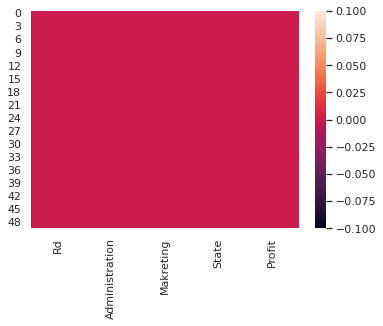

In [6]:
sns.heatmap(data.isna())

# Visualizing the data


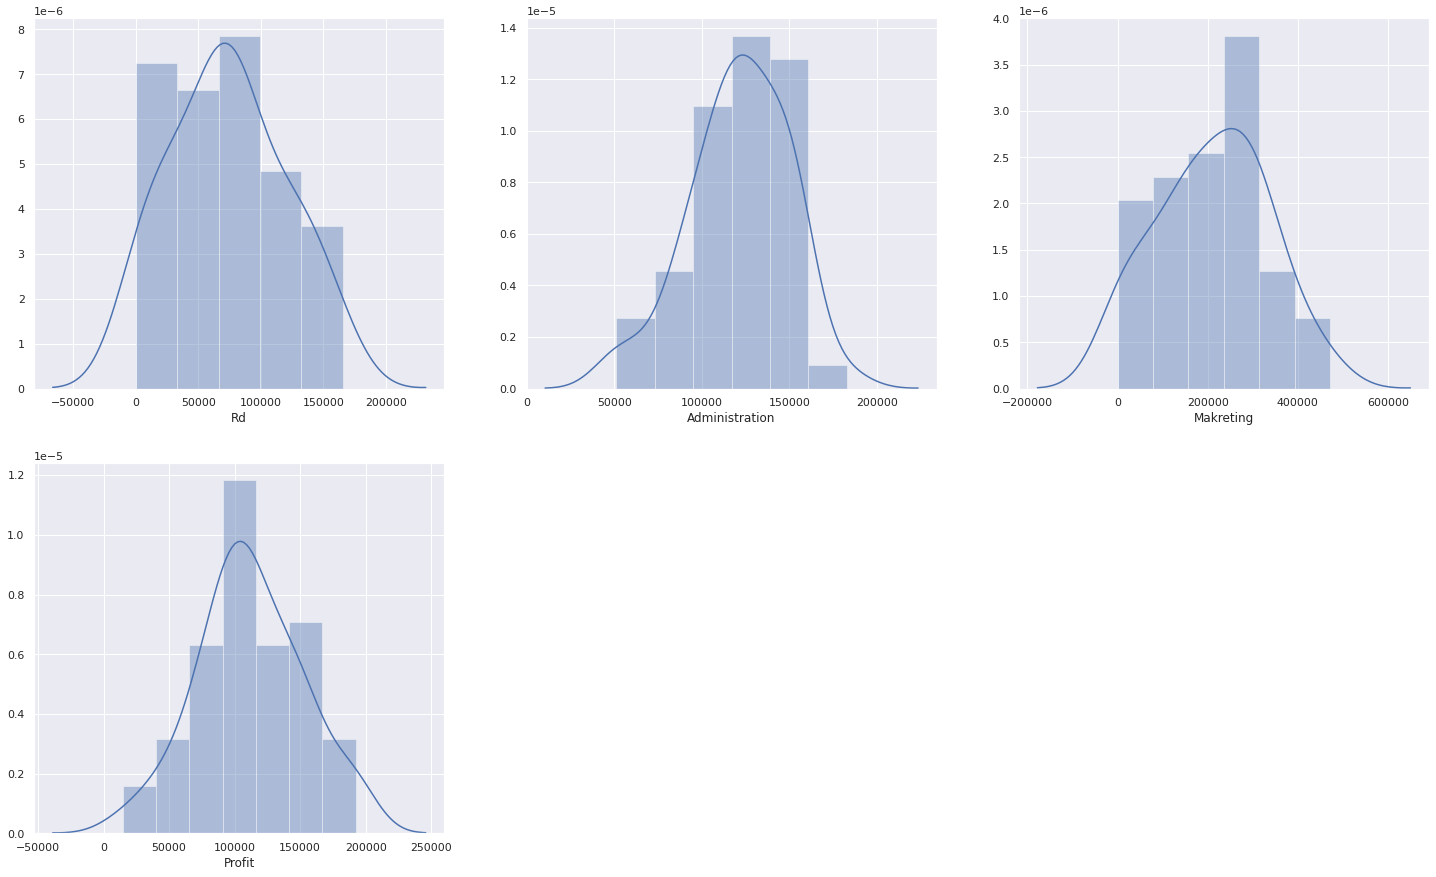

In [7]:
# Distribution Plot
k=1
fig,arr=plt.subplots(1,4,figsize=(25,15))

for i in data.columns :
  if i != 'State':
    plt.subplot(2,3,k)
    sns.distplot(data[i])
    k+=1

# all are in Gaussian Distribution

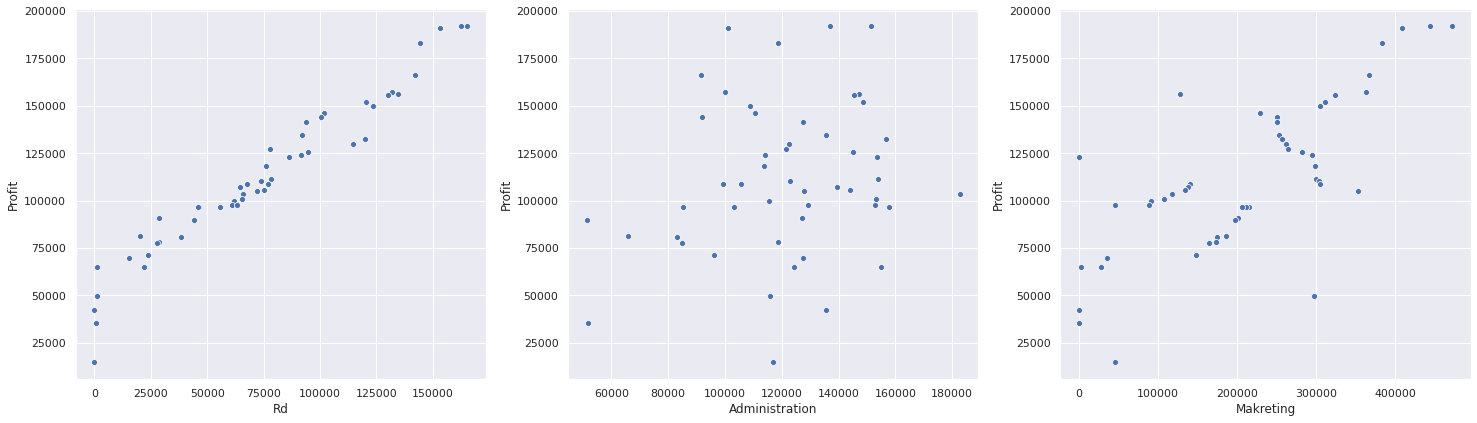

In [8]:
# Scatter Plot : Rd	Administration	Makreting	Profit
fig,arr=plt.subplots(1,3,figsize=(25,15))

plt.subplot(2,3,1)
sns.scatterplot('Rd','Profit',data=data)

plt.subplot(2,3,2)
sns.scatterplot('Administration','Profit',data=data)

plt.subplot(2,3,3)
sns.scatterplot('Makreting','Profit',data=data)

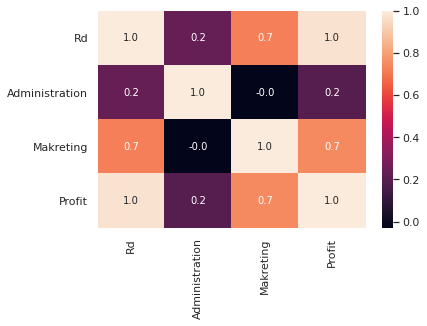

In [9]:
sns.heatmap(data.corr(),annot=True,fmt='.1f')  # corelation Matrix

# splitting data for training and testing

In [0]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x_train,x_test, y_train, y_test = tts(x,y, test_size=0.3,random_state=42)

# training the model

1. Before that, we need to convert the categorical variable to numerical variable thorugh onehotencoder and pipeline.

In [0]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.pipeline import make_pipeline as pipe
from sklearn.preprocessing  import  OneHotEncoder as ohe 
from sklearn.compose import ColumnTransformer as CT

In [0]:
preprocessor= CT( transformers= [('cat_encoder',ohe(),[3])], remainder='passthrough' )

pipe= pipe(preprocessor , lr(fit_intercept=True) )


In [15]:
#getting all the constants
pipe.get_params()

{'columntransformer': ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('cat_encoder',
                                  OneHotEncoder(categories='auto', drop=None,
                                                dtype=<class 'numpy.float64'>,
                                                handle_unknown='error',
                                                sparse=True),
                                  [3])],
                   verbose=False),
 'columntransformer__cat_encoder': OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
               handle_unknown='error', sparse=True),
 'columntransformer__cat_encoder__categories': 'auto',
 'columntransformer__cat_encoder__drop': None,
 'columntransformer__cat_encoder__dtype': numpy.float64,
 'columntransformer__cat_encoder__handle_unknown': 'error',
 'columntransformer__cat_encoder__sparse': True,
 'column

In [16]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat_encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  [3])],
                                   verbose=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  norma

In [17]:
pipe.get_params()['linearregression'].coef_ , pipe.get_params()['linearregression'].intercept_

(array([ 2.59028652e+02,  7.17099427e+02, -9.76128080e+02,  8.04937292e-01,
        -9.12577104e-02,  2.80672826e-02]), 57153.61206240766)

In [18]:
pipe.named_steps['columntransformer']

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('cat_encoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 [3])],
                  verbose=False)

# testing the model

In [19]:
prediction=pipe.predict(x_test)
prediction

array([126187.39411505,  85788.82259512,  99777.02815177,  45706.12238327,
       127062.20722772,  51891.83884456, 109114.62977494, 100600.61123701,
        97953.99874714, 111730.57706807, 128818.49200668, 174195.35772633,
        93736.28538438, 148381.04097161, 172313.8713939 ])

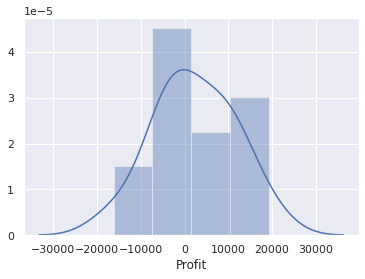

In [20]:
sns.distplot(y_test-prediction) #Gaussian Distribution

# evaluation of Accuracy

In [0]:
from sklearn.metrics import r2_score,mean_squared_error as mse

In [22]:
np.sqrt(mse(y_test,prediction))  # RMSE

9210.154995185065

In [23]:
round(r2_score(y_test,prediction),2)

0.94

# Note

1. Using multiple linear regression model, the accuracy is 94% and the RMSE is 9210.15.

2.  Lets say i want to predict the profit with a set of inputs

In [24]:
input= [[165349.2 ,136897.8, 471784.1, 'California']]
pipe.predict(input)

array([191257.09582341])

In [0]:
# Thus that we will get a profit of 191257.09582341 .
# we have successfully predicted ..
# Done Model 